In [1]:
import uproot
import pandas
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root")
print(file.classnames())

{'rootuple;1': 'TDirectory', 'rootuple/CandidateTree;1': 'TTree', 'rootuple/UpsTree;1': 'TTree'}


In [3]:
rootuples = file["rootuple"]

In [4]:
rootuples["UpsTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
numPrimaryVertices   | int32_t                  | AsDtype('>i4')
trigger              | int32_t                  | AsDtype('>i4')
ups_p4               | TLorentzVector           | AsStridedObjects(Model_TLor...
muonP_p4             | TLorentzVector           | AsStridedObjects(Model_TLor...
muonN_p4             | TLorentzVector           | AsStridedObjects(Model_TLor...
iPVwithmuons_ups     | int32_t                  | AsDtype('>i4')
ups_vertexWeight     | double                   | AsDtype('>f8')
ups_vProb            | double                   | AsDtype('>f8')
ups_vMass            | double                   | AsDtype('>f8')
ups_vNChi2           | double                   | AsDtype('>f8')
ups_DCA   

In [25]:
rootuples["CandidateTree"].arrays(library="pd")

/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.10/site-packages/uproot/interpretation/library.py:811: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

In [12]:
dataframe.to_hdf("candidate_tree.h5", key="sdf")

In [4]:
ups_tree = pandas.read_hdf("raw/ups_tree.h5")
candidate_tree = pandas.read_hdf("raw/candidate_tree.h5")

In [30]:
rootuples["CandidateTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
nCandPerEvent        | int32_t                  | AsDtype('>i4')
numPrimaryVertices   | int32_t                  | AsDtype('>i4')
trigger              | int32_t                  | AsDtype('>i4')
candidate_p4         | TLorentzVector           | AsStridedObjects(Model_TLor...
track1_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
track2_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
ditrack_p4           | TLorentzVector           | AsStridedObjects(Model_TLor...
dimuon_p4            | TLorentzVector           | AsStridedObjects(Model_TLor...
muonp_p4             | TLorentzVector           | AsStridedObjects(Model_TLor...
muonn_p4             | TLor

In [22]:
candidate_tree['candidate_p4']['fP']

,fX,fY,fZ
0,-12.896234,13.289232,34.000256
1,-12.772388,13.479754,33.044973
2,-13.169571,13.749406,32.852437
3,-12.566837,13.877199,32.822862
4,-12.983646,13.571666,35.334902
...,...,...,...
2877341,11.095191,-11.903943,3.114333
2877342,11.259276,-11.981278,3.325361
2877343,11.155286,-12.059712,3.203376
2877344,11.087811,-11.568732,3.103587


In [ ]:
candidate_tree = candidate_tree.drop(candidate_tree[candidate_tree.candidate_vProb < 0.1].index)

In [13]:
candidate_tree.insert(1, "candidate_fP", (candidate_tree['candidate_p4']['fP']['fX']**2 + candidate_tree['candidate_p4']['fP']['fY']**2 + candidate_tree['candidate_p4']['fP']['fZ']**2) ** 0.5)

In [28]:
candidate_tree = candidate_tree.drop(columns="fP")

/tmp/ipykernel_16688/2319003831.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  candidate_tree = candidate_tree.drop(columns="fP")


In [43]:
candidate_tree["candidate_fP"]

0          38.716068
1          37.905249
2          37.970599
3          37.786801
4          40.016503
             ...    
2877341    16.568228
2877342    16.774396
2877343    16.737344
2877344    16.321990
2877345    18.222519
Name: candidate_fP, Length: 2877346, dtype: float64

<AxesSubplot:>

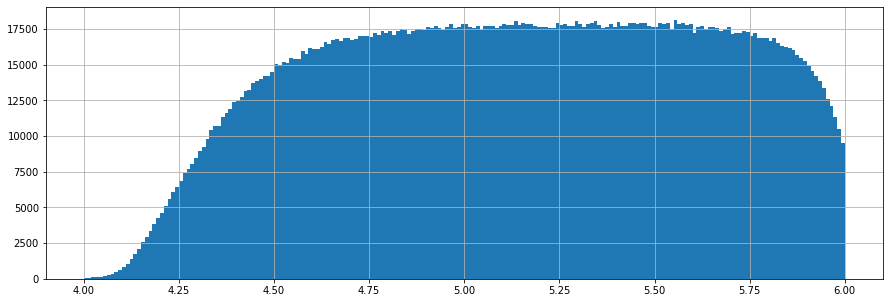

In [14]:
candidate_tree.insert(1, "candidate_m", (candidate_tree['candidate_p4']['fE']**2 - candidate_tree['candidate_fP']**2) ** 0.5)
candidate_tree["candidate_m"].hist(bins=200, figsize=(15, 5))

<AxesSubplot:>

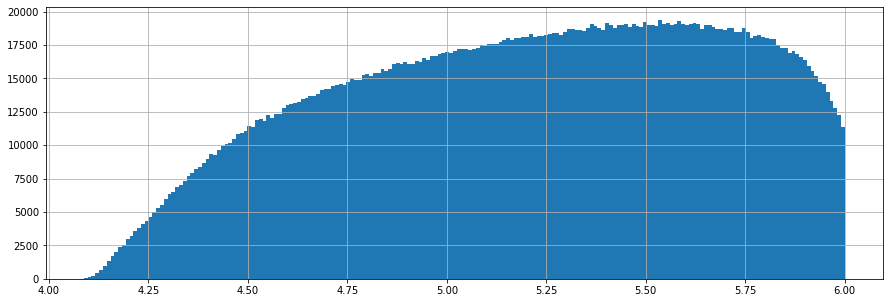

In [15]:
candidate_tree['candidate_vMass'].hist(bins=200, figsize=(15, 5))

In [1]:
candidate_tree['candidate_cosAlpha '].hist(bins=10, figsize=(15, 5))

NameError: name 'candidate_tree' is not defined

In [91]:
candidate_tree = candidate_tree.drop(candidate_tree[candidate_tree.candidate_cosAlpha < 0.99].index)

<AxesSubplot:>

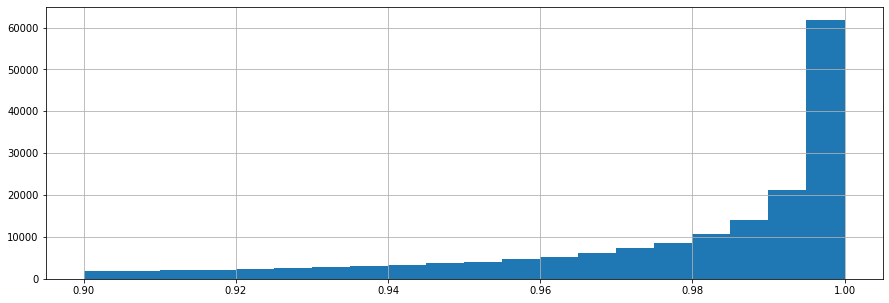

In [92]:
abs(candidate_tree['candidate_cosAlpha']).hist(bins=20, figsize=(15, 5))

In [93]:
candidate_tree

run       event nCandPerEvent numPrimaryVertices trigger  \
                                                                       
                                                                       
0        323841   552354231            29                 31       0   
1        323841   552354231            29                 31       0   
29       323841   551198558             2                 30       0   
181      323841   551272561            17                 26       0   
182      323841   551272561            17                 26       0   
...         ...         ...           ...                ...     ...   
2877331  323778  1170446164             5                 20       0   
2877332  323778  1170446164             5                 20       0   
2877333  323778  1170446164             5                 20       0   
2877334  323778  1170446164             5                 20       0   
2877335  323778  1170446164             5                 20       0   

        candidate_p4                                  track1_p4  ...  \
                  fP                               fE        fP  ...   
                  fX         fY         fZ                   fX  ...   
0         -12.896234  13.289232  34.000256  39.082240 -0.511994  ...   
1         -12.772388  13.479754  33.044973  38.250056 -0.460510  ...   
29         14.102908  -7.387182  13.949071  21.640259  1.580473  ...   
181        18.754642  -7.422967 -49.670005  53.931184  0.587341  ...   
182        20.036696  -7.456149 -54.811826  59.020910  1.169277  ...   
...              ...        ...        ...        ...       ...  ...   
2877331    -7.253327 -13.439889   0.748807  16.234796 -0.717270  ...   
2877332    -6.929379 -13.684290   0.518145  16.306924 -0.393322  ...   
2877333    -6.506071 -13.812465   0.265454  16.340456 -0.393322  ...   
2877334    -7.596794 -13.473767   0.588650  16.547322 -1.060738  ...   
2877335    -7.565568 -13.273222   0.825537  16.333914 -0.717270  ...   

        track2_SDxyDsz track2_SDszDsz vChi2KalmanKK vNDFKalmanKK  \
                                                                   
                                                                   
0         4.043407e-06       0.000236      0.069050          1.0   
1         2.727896e-07       0.000154      0.998792          1.0   
29        2.452710e-07       0.000033      0.018591          1.0   
181       1.813705e-06       0.000086      0.496986          1.0   
182       2.354937e-07       0.000038      0.036609          1.0   
...                ...            ...           ...          ...   
2877331   1.149443e-07       0.000113      0.020143          1.0   
2877332   1.149443e-07       0.000113      0.001968          1.0   
2877333  -3.315220e-07       0.000070      0.434184          1.0   
2877334   1.149443e-07       0.000113      2.192664          1.0   
2877335   9.885698e-07       0.000058      1.953079          1.0   

        vProbKalmanKK vChi2KinematicKK vNDFKinematicKK vProbKinematicKK  \
                                                                          
                                                                          
0            0.792726         0.069050             1.0         0.792726   
1            0.317603         0.998792             1.0         0.317603   
29           0.891546         0.018591             1.0         0.891546   
181          0.480828         0.496986             1.0         0.480828   
182          0.848263         0.036609             1.0         0.848263   
...               ...              ...             ...              ...   
2877331      0.887139         0.020143             1.0         0.887139   
2877332      0.964613         0.001968             1.0         0.964613   
2877333      0.509943         0.434184             1.0         0.509943   
2877334      0.138669         2.192665             1.0         0.138669   
2877335      0.162255         1.953079             1.0         0.1

In [5]:
cosalpha_cut = (candidate_tree['candidate_cosAlpha']>0.99)

<AxesSubplot:>

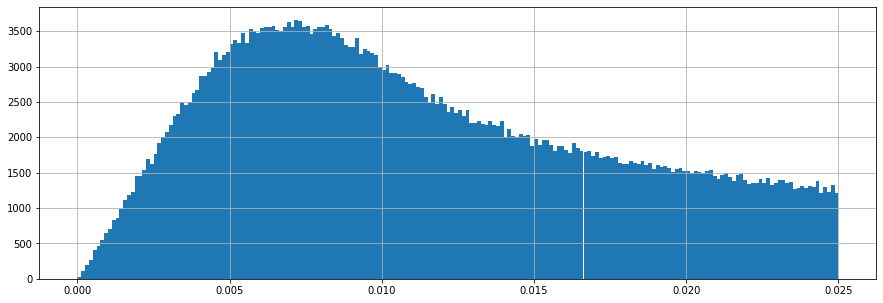

In [8]:
candidate_tree.loc[cosalpha_cut, "candidate_lxy"].hist(bins=200, range=(0.0, 0.025), figsize=(15, 5))
candidate_tree.loc[-cosalpha_cut, "candidate_lxy"].hist(bins=200, range=(0.0, 0.025), figsize=(15, 5)) #inversed cut

<AxesSubplot:>

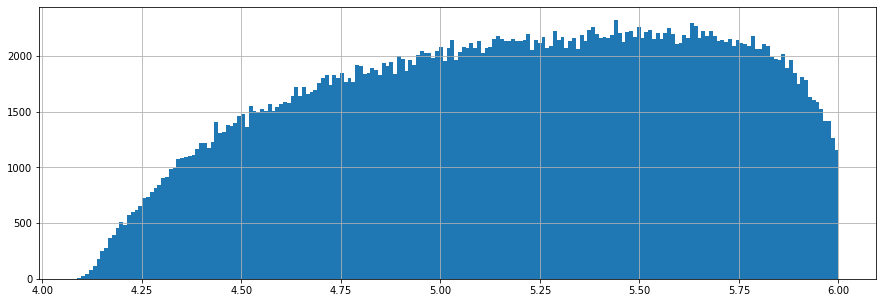

In [21]:
cut = (candidate_tree['candidate_charge'] == 0) & (candidate_tree['candidate_cosAlpha'] > 0.99)

candidate_tree[cut]['candidate_vMass'].hist(bins=200, figsize=(15, 5))

In [ ]:
# insert new column
# data.loc[:, "new_column"] = [new_column]